In [1]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [2]:
#岭回归
work_mul<-window(Seatbelts, end = 1982+11/12)
X <- work_mul[,-1]
y <- work_mul[,1]
y <- as.vector(y)
model <- cv.glmnet(as.matrix(X),y,alpha = 0,keep=T,
                   lambda = 10^seq(4,-1,-0.1))
best_lambda <- model$lambda.min
ridge_coeff <- predict(model,s = best_lambda,
                       type = "coefficients")
ridge_coeff

8 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept) -2.484275e+01
drivers      7.922750e-02
front        3.457002e-03
rear         1.227454e-03
kms          7.638977e-04
PetrolPrice -1.702826e+01
VanKilled    1.797786e-01
law          .           

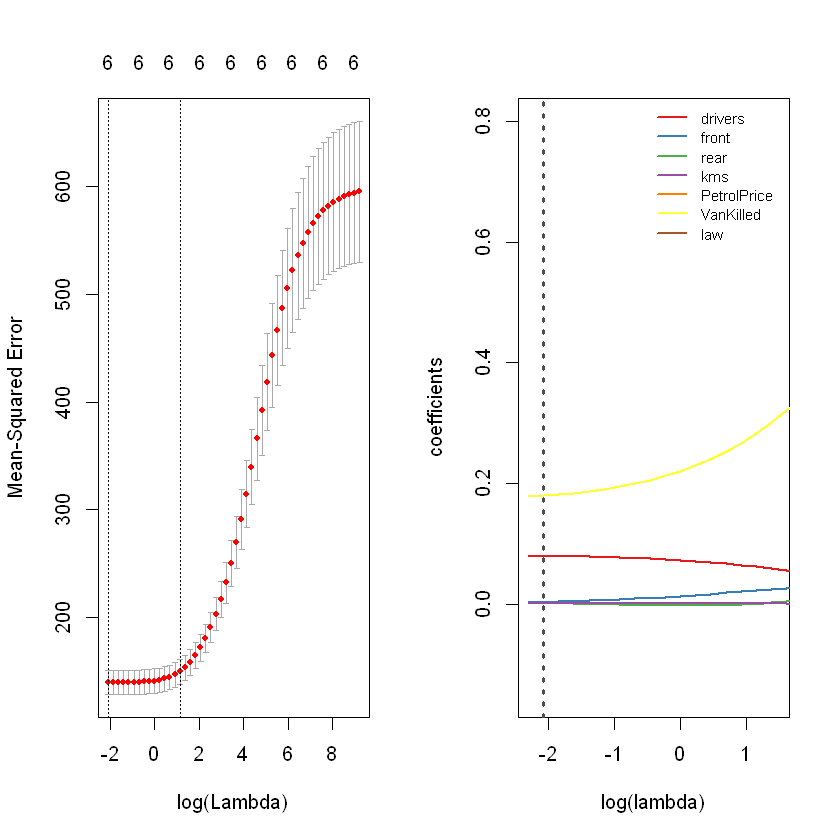

In [3]:
op=par(mfrow=c(1,2))
plot(model)
hatbeta <- as.matrix(model$glmnet.fit$beta)
lambda = log(10^seq(4,-1,-0.1))
plot(1,type = 'n',xlim = c(-2.3,1.5),ylim = c(-0.15,0.8),
     xlab = 'log(lambda)',ylab = 'coefficients')
colrs = RColorBrewer::brewer.pal(8,"Set1")
for (i in 1:6) {
  lines(lambda,hatbeta[i,],col=colrs[i],lwd=2)
}
abline(v=log(best_lambda),lty=3,lwd=3,col='gray30')
legend('topright',rownames(hatbeta),lty = 1,lwd=2,
       col=colrs,bty = 'n',cex = 0.75)

par(op)

In [5]:
pre=predict(model,X)

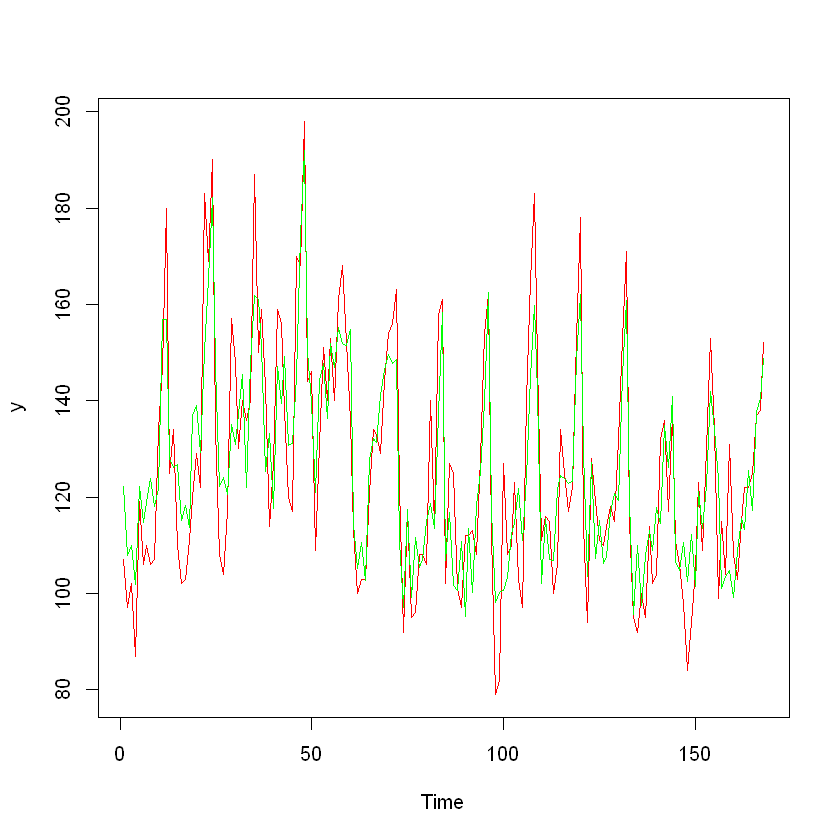

In [6]:
ts.plot(y,col="red")
lines(ts(pre),col="green")

In [10]:
rmse=(sum(((pre - y)**2))/length(y))^(1/2)
rmse

[1] 11.73587